# 定常性の確認

## 準備

In [1]:
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.tsa.api as tsa

%matplotlib inline
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'  # 日本語を表示できるフォントを指定

In [2]:
np.random.seed(42)

In [4]:
FILE_PATH = './data/2020413_raw.csv'
df = pd.read_csv(FILE_PATH, index_col=0, parse_dates=True, encoding='shift-jis')

In [5]:
df.head()

,気化器圧力_PV,気化器圧力_SV,気化器圧力_MV,気化器圧力_MODE,気化器液面レベル_PV,気化器液面レベル_SV,気化器液面レベル_MV,気化器液面レベル_MODE,気化器温度_PV,気化器ヒータ出口温度_PV,...,反応器流入組成（H2O）_PV,反応器流入組成（HAc）_PV,セパレータ蒸気排出量_MV (Fixed),セパレータ蒸気排出量_MODE (Fixed),アブソーバスクラブ流量_MV (Fixed),アブソーバスクラブ流量_MODE (Fixed),アブソーバ還流流量_MV (Fixed),アブソーバ還流流量_MODE (Fixed),気化器液体流入量_MV (Fixed),気化器液体流入量_MODE (Fixed)
2020-04-13 00:00:00,127.983294,127.883920,18.728267,AUT,0.700204,0.7,21876.987772,AUT,120.159558,151.274003,...,0.008524,0.109444,16.1026,AUT,15.1198,AUT,0.766,MAN,2.1924,AUT
2020-04-13 00:00:01,128.262272,127.807691,18.728267,AUT,0.700865,0.7,21876.987772,AUT,120.072575,151.218620,...,0.008512,0.109441,16.1026,AUT,15.1198,MAN,0.766,MAN,2.1924,AUT
2020-04-13 00:00:02,127.899077,127.991074,19.079324,AUT,0.699740,0.7,21918.359526,AUT,120.305327,151.201067,...,0.008541,0.109871,16.1026,AUT,15.1198,AUT,0.756,MAN,2.1924,AUT
2020-04-13 00:00:03,127.622218,127.990697,18.772228,AUT,0.699970,0.7,21892.166478,AUT,120.219488,151.220816,...,0.008573,0.109775,16.1026,AUT,15.1198,AUT,0.746,MAN,2.1924,AUT
2020-04-13 00:00:04,127.577243,127.903788,18.605173,AUT,0.700939,0.7,21885.688813,AUT,120.302267,151.165624,...,0.008547,0.109868,16.1026,AUT,15.1198,AUT,0.766,MAN,2.1924,AUT


## 一変量時系列の定常性

### 時系列の描画による確認

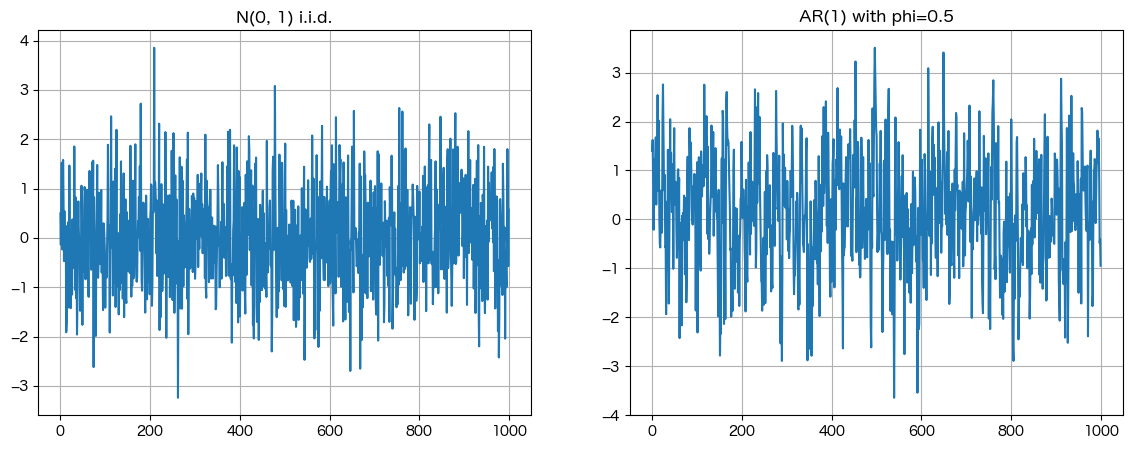

In [6]:
# ホワイトノイズの生成
xx_wn = np.random.normal(size=(1000,))

# AR(1)の生成
x_prev = 0.
xx_ar = np.zeros(shape=(1000,))

for i in range(1000):
    xx_ar[i] = 0.5 * x_prev + np.random.normal()
    x_prev = xx_ar[i]

    
# 描画
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(xx_wn)
ax1.set_title('N(0, 1) i.i.d.')
ax1.grid()

ax2.plot(xx_ar)
ax2.set_title('AR(1) with phi=0.5')
ax2.grid()

plt.show()

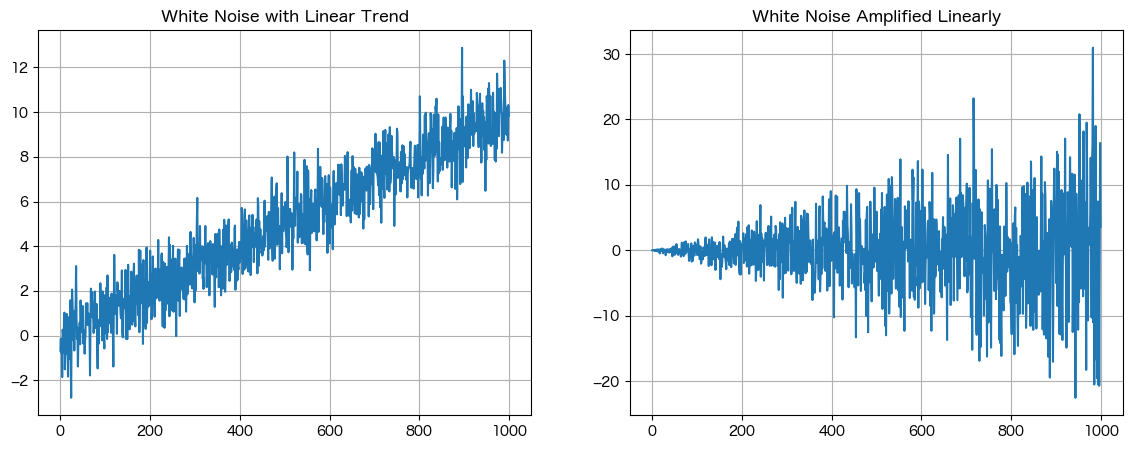

In [7]:
xx_ln = np.arange(1000)
xx_lt = 0.01 * xx_ln + np.random.normal(size=(1000,))
xx_av = 0.01 * xx_ln * np.random.normal(size=(1000,))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(xx_lt)
ax1.set_title('White Noise with Linear Trend')
ax1.grid()

ax2.plot(xx_av)
ax2.set_title('White Noise Amplified Linearly')
ax2.grid()

plt.show()

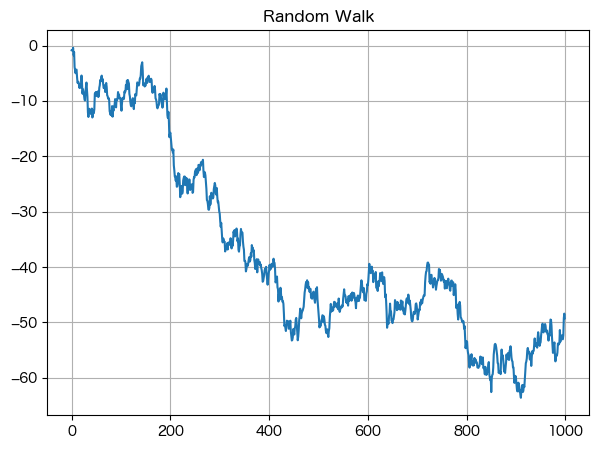

In [8]:
x_prev = 0.
xx_rw = np.zeros(shape=(1000,))

for i in range(1000):
    xx_rw[i] = x_prev + np.random.normal()
    x_prev = xx_rw[i]
    
    
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(xx_rw)
ax.set_title('Random Walk')
ax.grid()

plt.show()

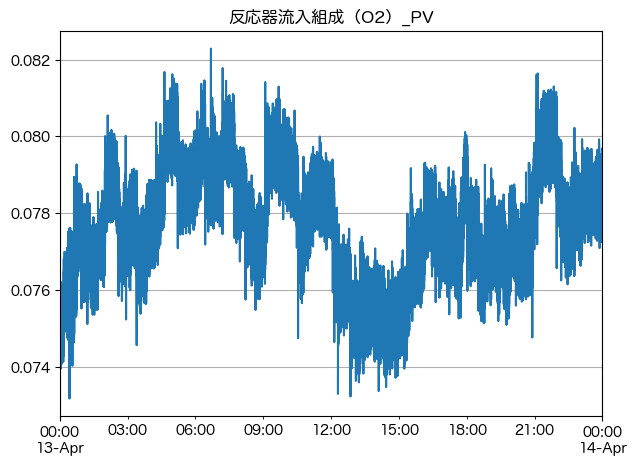

In [9]:
colname_pv = '反応器流入組成（O2）_PV'

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

df[colname_pv].plot(ax=ax)
ax.set_title(colname_pv)
ax.grid()

plt.show()

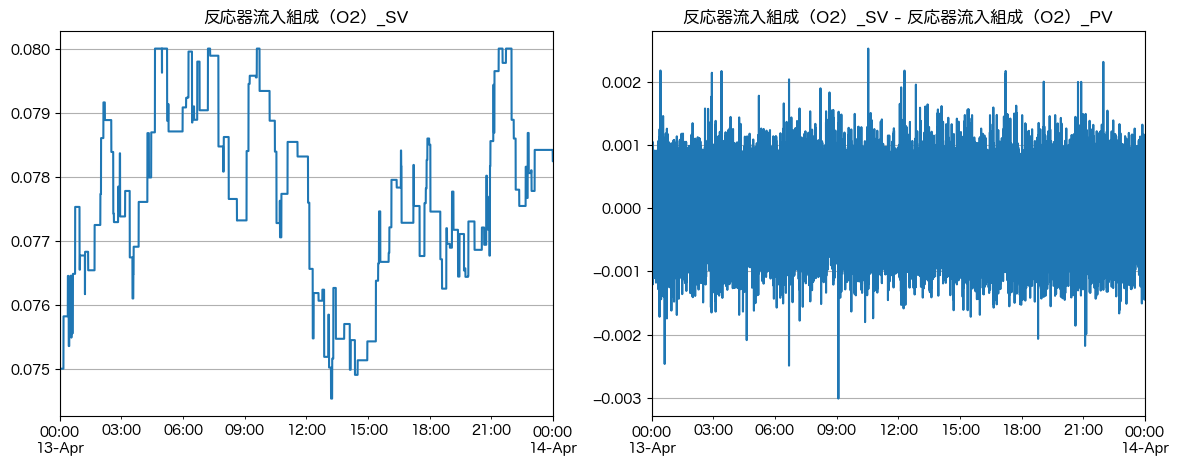

In [10]:
colname_sv = '反応器流入組成（O2）_SV'
sr_dv = df[colname_sv] - df[colname_pv]  # 制御偏差（DV）の系列を計算

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 設定値（SV）の系列をプロット
df[colname_sv].plot(ax=ax1)
ax1.set_title(colname_sv)
ax1.grid()

# 制御偏差（DV）の系列をプロット
sr_dv.plot(ax=ax2)
ax2.set_title(f'{colname_sv} - {colname_pv}')
ax2.grid()

plt.show()

### ヒストグラムの描画による確認

In [11]:
threshold = dt.datetime(2020, 4, 13, 12)  # 2020/4/13, 12:00を境に系列を分割
index_fh = df.index < threshold
index_lh = df.index >= threshold

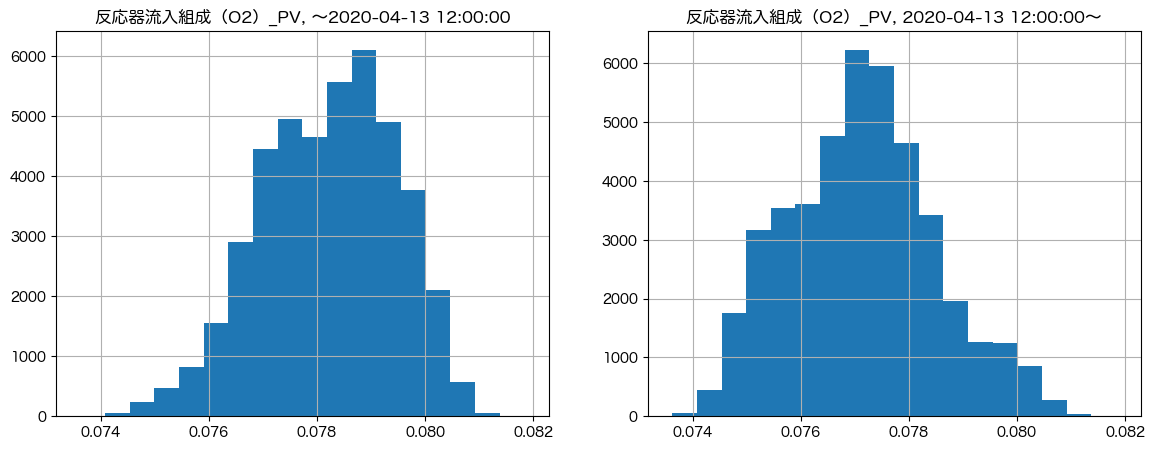

In [12]:
xlim = (df[colname_pv].min(), df[colname_pv].max())
bins = np.linspace(*xlim, 21)  # 比較のためにヒストグラムのbinsを揃える

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 2020/4/13, 12:00以前のヒストグラム
df[colname_pv][index_fh].hist(ax=ax1, bins=bins)
ax1.set_xlim(xlim)
ax1.set_title(f'{colname_pv}, 〜{threshold}')

# 2020/4/13, 12:00以降のヒストグラム
df[colname_pv][index_lh].hist(ax=ax2, bins=bins)
ax2.set_xlim(xlim)
ax2.set_title(f'{colname_pv}, {threshold}〜')

plt.show()

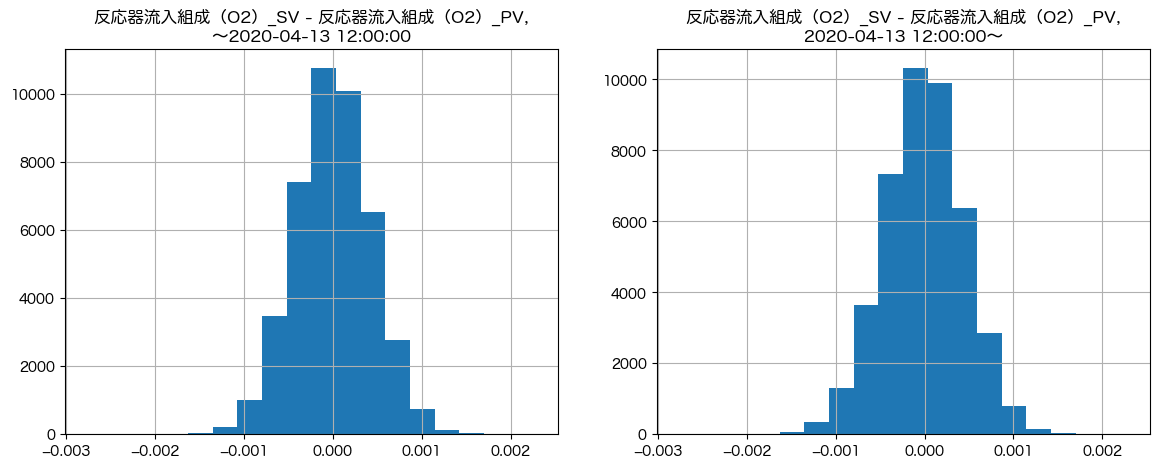

In [13]:
plt.figure(figsize=(14, 5))
xlim = (sr_dv.min(), sr_dv.max())
bins = np.linspace(*xlim, 21)  # 比較のためにヒストグラムのbinsを揃える

# 2020/4/13, 12:00以前のヒストグラム
plt.subplot(1, 2, 1)
plt.xlim(xlim)
sr_dv[index_fh].hist(bins=bins)
plt.title(f'{colname_sv} - {colname_pv},\n〜{threshold}')

# 2020/4/13, 12:00以降のヒストグラム
plt.subplot(1, 2, 2)
plt.xlim(xlim)
sr_dv[index_lh].hist(bins=bins)
plt.title(f'{colname_sv} - {colname_pv},\n{threshold}〜')

plt.show()

### 統計的検定による確認

In [14]:
adf_rlt_pv = tsa.adfuller(df[colname_pv].values)

print(f'ADF statistics: {adf_rlt_pv[0]}')
print(f'# of lags used: {adf_rlt_pv[2]}')
print(f'Critical values: {adf_rlt_pv[4]}')

ADF statistics: -2.6856932356227174
# of lags used: 16
Critical values: {'1%': -3.430425702610773, '5%': -2.8615734593098154, '10%': -2.5667878092299223}


In [15]:
adf_rlt_dv = tsa.adfuller(sr_dv.values)

print(f'ADF statistics: {adf_rlt_dv[0]}')
print(f'# of lags used: {adf_rlt_dv[2]}')
print(f'Critical values: {adf_rlt_dv[4]}')

ADF statistics: -11.450070158599813
# of lags used: 26
Critical values: {'1%': -3.4304257113755474, '5%': -2.8615734631836522, '10%': -2.5667878112918396}


### 局所的な定常性について

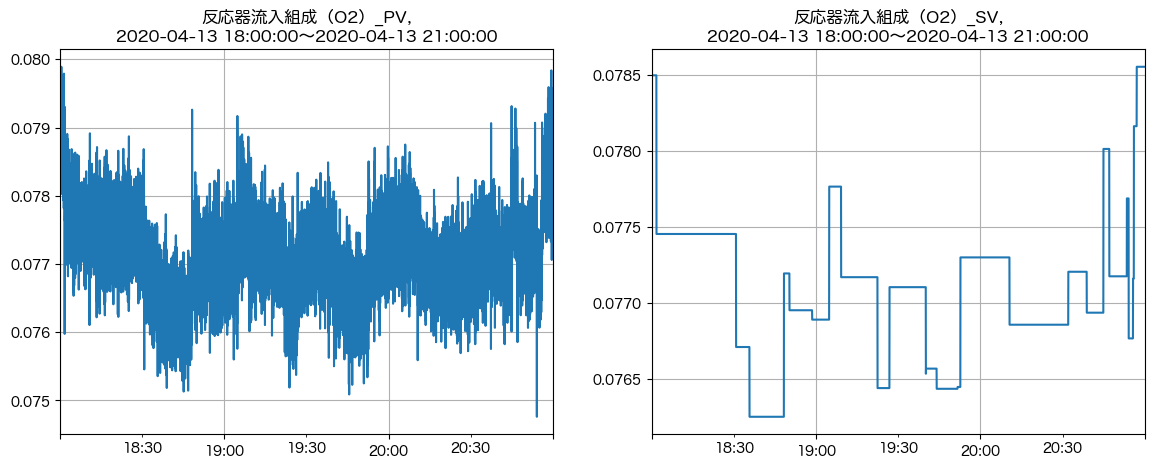

In [16]:
stat_bound_0 = dt.datetime(2020, 4, 13, 18)  #2020/4/13, 18:00を境界に指定
stat_bound_1 = dt.datetime(2020, 4, 13, 21)  #2020/4/13, 21:00を境界に指定

stat_duration = (stat_bound_0 < df.index) & (df.index < stat_bound_1)
sr_pv_stat = df[colname_pv][stat_duration]
sr_sv_stat = df[colname_sv][stat_duration]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 測定値（PV）の系列をプロット
sr_pv_stat.plot(ax=ax1)
ax1.set_title(f'{colname_pv},\n{stat_bound_0}〜{stat_bound_1}')
ax1.grid()

# 設定値（SV）の系列をプロット
sr_sv_stat.plot(ax=ax2)
ax2.set_title(f'{colname_sv},\n{stat_bound_0}〜{stat_bound_1}')
ax2.grid()

plt.show()

In [17]:
adf_rlt_pv_stat = tsa.adfuller(sr_pv_stat.values)

print(f'ADF statistics: {adf_rlt_pv_stat[0]}')
print(f'# of lags used: {adf_rlt_pv_stat[2]}')
print(f'Critical values: {adf_rlt_pv_stat[4]}')

ADF statistics: -3.320176495405489
# of lags used: 12
Critical values: {'1%': -3.4309564210049537, '5%': -2.8618080041618827, '10%': -2.5669126534795277}


## 多変量時系列の定常性